# Линейный классификатор

### 1. Генерация выборки

Машинное обучение всегда начинается с данных.
Для первого раза нам будет достаточно случайно сгенерированных точек в пространстве $\mathbb{R}^{2}$. Задно мы начнем наше знакомство с библиотекой <a href="http://docs.scipy.org/doc/numpy/">numpy</a>.

В качестве случайного распределения предлагаю взять <a href="https://en.wikipedia.org/wiki/Multivariate_normal_distribution">многоменое нормальное распределение</a>. У каждого класса будет свой центр $\mu$, а все точки из обучающего множества разбросаны случайно в соответствии с распредилением $\mathcal{N}(\mu, \Sigma)$, где $\Sigma$ -  диагональная матрица, где на главной диагонали находятся дисперсия разброса точек по каждой оси.

Звучит это, пожалуй, сложно, но на деле сущая ерунда! Загрузим библиотеку.

In [1]:
import numpy as np

Теперь создадим два вектора с помощью функции <a hred="http://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html#numpy.array">array</a>. 

In [2]:
mu_red = np.array([-2, 0])
mu_blue = np.array([2, 2])

Попробуем распечатать их. И узнаем размерность.

In [3]:
print('mu_red = {}, shape = {}'.format(mu_red, mu_red.shape))

mu_red = [-2  0], shape = (2,)


Теперь сгенерируем данные. Предлагаю не заморчиваться и в качестве матрицы ковариаций использовать единичную. Тем более для ее создания есть готовая функция <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html#numpy-eye">eye</a>.

In [4]:
I = np.eye(2, 2)
print(I)

[[ 1.  0.]
 [ 0.  1.]]


Теперь самое время заняться генерацией точек. В этом нам поможет модуль <a href="http://docs.scipy.org/doc/numpy/reference/routines.random.html">numpy.random</a>. Давайте сгенериуруем по 100 точек каждого цвета. У нас есть уже готовая <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html#numpy.random.multivariate_normal">функция</a>.

In [5]:
N = 100

При этом сразу же сделаем вектор с меткой класса: для красных 1, а для синих -1.

In [6]:
X_red = np.random.multivariate_normal(mu_red, I, N)
y_red = np.ones(shape=(N,1))

X_blue = np.random.multivariate_normal(mu_blue, I, N)
y_blue = -np.ones(shape=(N,1))

Конечно, мы можем снова распечатать полученные матрицы. Но это не слишком наглядно. Давайте попробуем немного порисовать. Для этого мы воспользуемся новой библиотекой <a href="http://matplotlib.org/api/pyplot_summary.html">pyplot</a>.

In [7]:
import matplotlib.pyplot as pl

Для того, чтобы все графики рисовались прям здесь, нужно вызвать небольшую команду.

In [8]:
%matplotlib inline 

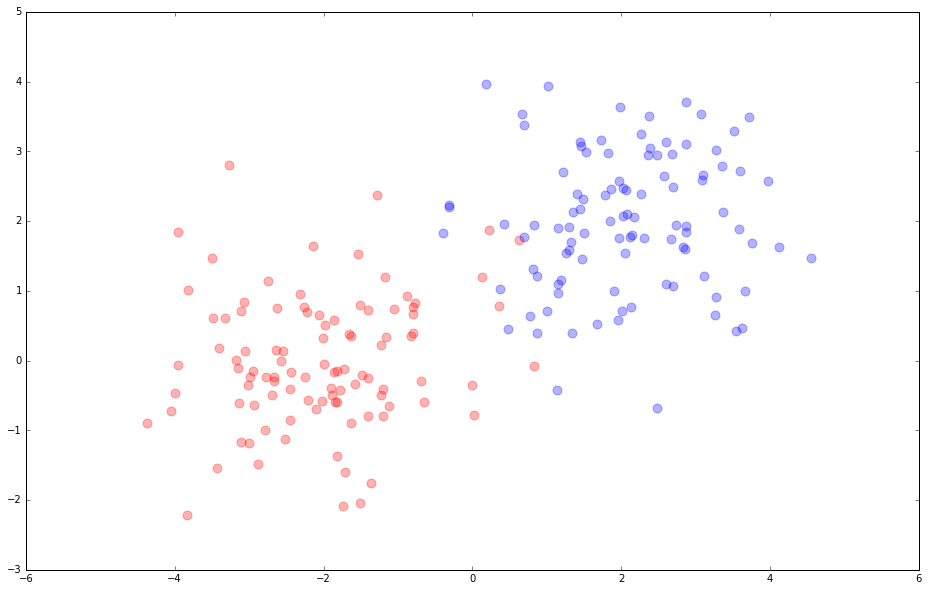

In [9]:
pl.figure(figsize=(16, 10))
pl.axes()

pl.scatter(X_red[:, 0], X_red[:, 1], s=80, color='red', alpha=0.3)
pl.scatter(X_blue[:, 0], X_blue[:, 1], s=80, color='blue', alpha=0.3)

Вот сейчас произошло много интересного. Во-первых, мы попробовали функцию <a = href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter">scatter</a>. А во-вторых, научились делать срезы на матрицах из numpy. Подробнее об этом можно почитать <a href="http://docs.scipy.org/doc/numpy/user/basics.indexing.html">здесь</a>.

### 2. Первое обучение.

Итак, мы хотим обучить свой первый линейный классификатор. Для этого мы хотим решить задачу линейной регрессии. Мы предполагаем, что

<center> $\hat{y} = w_0 + w_1x_1 + w_2x_2$, где  $w = (w_0, w_1, w_2)$. </center>

Тогда, если приписать к X слева столбец из $1$, то все сводится к задаче

<center>$\begin{align*} \min_{w} \sum_{x \in X} \big(wx - y \big)^2\end{align*}$.</center>

Для обучения воспользуемся библиотекой <a href="http://scikit-learn.org">sklearn</a>. В частности нас интересует <a href="http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">квадритичная регрессия</a>.

In [10]:
from sklearn import linear_model as lm

Для начала нужно немного реорганизовать наши данные для обучения.

In [11]:
X_train = np.vstack([X_red, X_blue])
y_train = np.vstack([y_red, y_blue])

А затем обучить модель.

In [13]:
classifier = lm.LinearRegression()
classifier.fit(X_train, y_train)

w0 = classifier.intercept_[0]
w1, w2 = classifier.coef_[0][0], classifier.coef_[0][1]

print('(w0, w1, w2) = {}'.format((w0, w1, w2)))

(w0, w1, w2) = (0.16258286044077142, -0.31757388809858939, -0.16373028195739819)


Попробуем теперь построить разделяющуюу прямую.

In [14]:
def l(x):
    return -(w0 + w1*x)/w2

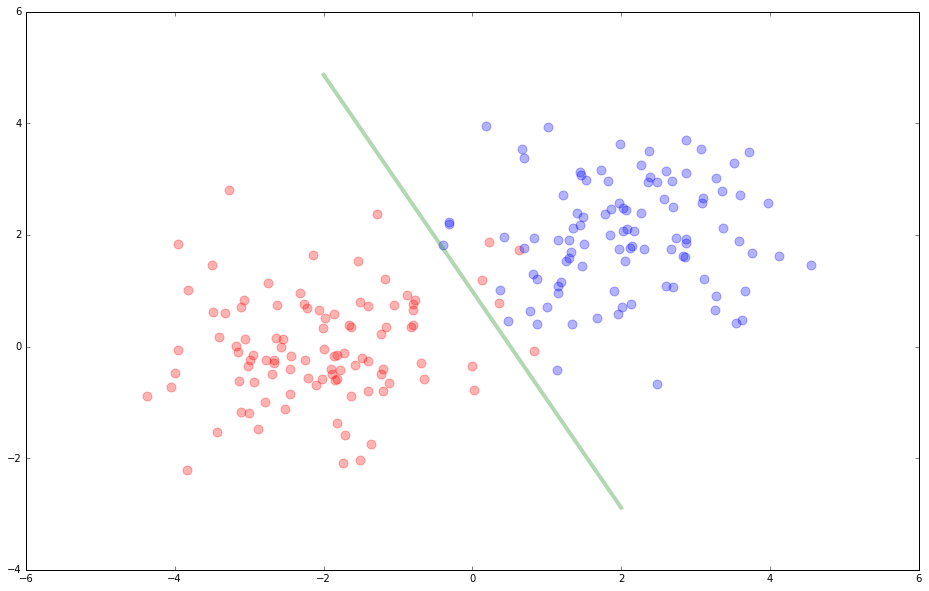

In [15]:
pl.figure(figsize=(16, 10))

pl.scatter(X_red[:, 0], X_red[:, 1], s=80, color='red', alpha=0.3)
pl.scatter(X_blue[:, 0], X_blue[:, 1], s=80, color='blue', alpha=0.3)

pl.plot([-2, 2], [l(-2), l(2)], color='green', linewidth=4, alpha=0.3)

### 3. Первое тестирование.

Очевидно, что такая способ генерации выборки не делает ее линейно разделимой, однако даже наша простая линейная может показывать уже какое-то пристойне качество. Давайте попробуем его подсчитать. Для этого воспользуемся самой интуитивно понятной метрикой - число неверных классификации.

Для этого сгенерируем еще одну выборку, только уже тестовую.

In [16]:
N_test = 100

X_red_test = np.random.multivariate_normal(mu_red, I, N_test)
y_red_test = np.ones(shape=(N_test, 1))

X_blue_test = np.random.multivariate_normal(mu_blue, I, N_test)
y_blue_test = -np.ones(shape=(N_test, 1))

Соберем из этого тестовую выборку.

In [17]:
X_test = np.vstack([X_red_test, X_blue_test])
y_test = np.vstack([y_red_test, y_blue_test])

Для этого воспользуемся следующей <a href="http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score">метрикой</a>.

In [18]:
from sklearn.metrics import accuracy_score as accuracy

Сначала получим ответ классификатора.

In [19]:
y_pred = classifier.predict(X_test)

Но, так как мы на самом деле используем регрессионную модель, то отве нужно несколько причесать. Все числа больше 0 заменить на 1. А все меньшие на -1.

In [20]:
y_pred[y_pred >= 0] = 1
y_pred[y_pred < 0] = -1

In [21]:
print(accuracy(y_test, y_pred))

0.99
